<h1>Summary</h1>

<h3>OLS : Ordinary Least Squares</h3>
OLS（ただの線形回帰）は、データセットが多くの特徴量を持つ場合は、過剰適合の可能性が高くなる<br>
LinearRegressionは内部で正規方程式（損失関数を最小にするパラメータ$\theta$を求める方程式）を解いている。ただし、疑似逆行列（ムーア・ペンローズの逆行列）を用いて近似的に算出している。疑似逆行列は特異値分解（SVD）という行列の標準的な分解テクニックを用いて算出可能。<br>

損失関数（平均二乗誤差：mean square error）：$MSE(X, h_\theta)=\frac{1}{m} \sum_{i=1}^{m} (\theta^T x^{(i)} - y^{(i)} )^2$

<h3>多項式回帰</h3>
各特徴量の累乗を新特徴量として追加し、この拡張特徴量セットで線形モデルを訓練することで、多項式回帰が可能だ。PolynomialFeaturesクラスを使って特徴量を追加する場合は、特徴量数が組合せ爆発を起こさないように注意しなければならない

<h3>Ridge</h3>
Ridge回帰は最小二乗法を行いつつ、係数の絶対値の大きさを可能な限り小さくするように（個々の特徴量が出力に与える影響をなるべく小さくするように）制約される（L2正則化）<br>
正則化とは、過剰適合を防ぐために明示的にモデルを制約することである<br>
RidgeもLinearRegressionと同様には内部で正規方程式（損失関数を最小にするパラメータ$\theta$を求める方程式）を解いている。Andre-Louis Choleskyの行列分解テクニックを用いている？<br>

損失関数：$J(\theta)=MSE(\theta) + \alpha\frac{1}{2} \sum_{i=1}^{n} {\theta_i}^2$

<h4>重要なパラメータ</h4>
alpha（デフォルトは1.0）<br>
alphaを大きくする⇒係数の制約が強くなる、alphaを小さくする⇒係数の制約が弱くなる（=Linear Regressionと同じような挙動になる）

<h3>Lasso</h3>
Lasso回帰は、Ridge回帰と同様に、係数が0になるように制約をかけるが、その結果いくつかの係数が完全に0になる（L1正則化）<br>
これはモデルにおいていくつかの特徴量が完全に無視される（自動的に特徴量が選択される）ことを意味し、どの特徴量が重要なのかが明らかとなり、モデルを解釈しやすくなる<br>

損失関数：$J(\theta)=MSE(\theta) + \alpha\sum_{i=1}^{n} |\theta_i|$

<h4>重要なパラメータ</h4>
alpha（デフォルトは1.0）<br>
alphaを大きくする⇒係数の制約が強くなる、alphaを小さくする⇒係数の制約が弱くなる（=Linear Regressionと同じような挙動になる）

<h3>Elastic Net</h3>
Elastic Netは、Ridge回帰とLasso回帰の中間である。正則化項（損失関数の$\alpha$が関連する部分）はRidge回帰とLasso回帰の正則化項を混ぜ合わせたもので、混ぜ方は割合rで変えられる。Elastic Netは、r=0のときにはRidge回帰と等しく、r=1のときにはLasso回帰と等しい<br>
ほとんどすべての場合、何らかの正則化をすべきなので、一般にプレーンな線形回帰は避けた方がよい。Ridgeはよいデフォルトになるが、意味がある特徴量は一部だけなのではないかと疑われるときには、役に立たない特徴量の重みを0に引き下げてくれるLassoやElastic Netを使った方がよい。そして、Lassoは訓練インスタンスの数よりも特徴量の数の方が多いときや、複数の特徴量の間に強い相関があるときに不規則な動きを示すことがあるので、一般にLassoよりもElastic Netの方がよい<br>

損失関数：$J(\theta)=MSE(\theta) + r\alpha\sum_{i=1}^{n} |\theta_i| + \frac{1-r}{2}\alpha \sum_{i=1}^{n} {\theta_i}^2$

<h4>重要なパラメータ</h4>
・alpha（デフォルトは1.0）<br>
alphaを大きくする⇒係数の制約が強くなる、alphaを小さくする⇒係数の制約が弱くなる（=Linear Regressionと同じような挙動になる）<br>
・l1_ratio（=ミックスの割合r）<br>
l1_ratio=0のときにはRidge回帰と等しく、l1_ratio=1のときにはLasso回帰と等しい

<h3>学習曲線</h3>
モデルが過学習、過小適合していることを見分ける方法の一つに交差検証があるが、ここでは学習曲線について記す<br>
学習曲線は、訓練セットのサイズの関数として訓練セット、検証セットに対する性能をプロットしたものである。プロットは、訓練セットのさまざまなサイズのサブセットを使って繰り返しモデルを訓練すれば描ける<br>
訓練誤差と検証誤差の曲線が一定の水準に達し、共に近接しているが、全体として誤差が大きい場合、これは過小適合しているモデルの典型例である。モデルが訓練データに過小適合している時には、訓練データを追加しても役に立たない。より複雑なモデルを使うか、よりよい特徴量を用意する必要がある<br>
訓練誤差と検証誤差の曲線の間に大きな差がある場合、これは、検証データに対する性能よりも訓練データに対する性能の方がかなり高いということであり、過学習の顕著な特徴である。過学習モデルの性能を上げるためには、例えば検証誤差が訓練誤差に達するまで訓練データを増やしていく、などすると良い

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
import mglearn

<h1>OLS : Ordinary Least Squares</h1>

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [4]:
# 係数と切片
print(f"lr.coef_: {lr.coef_}")
print(f"lr.intercept_: {lr.intercept_}")

lr.coef_: [-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]
lr.intercept_: 36.933255457118975


In [5]:
# 決定係数
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

Training set score: 0.77
Test set score: 0.64


In [6]:
# 以下では特徴量間の積（交互作用）も含んだ、拡張されたbostonデータを用いる
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

(506, 104)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [7]:
# 決定係数
print(f"Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Test set score: {lr.score(X_test, y_test):.2f}")

Training set score: 0.95
Test set score: 0.61


<h1>多項式回帰</h1>

In [8]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
print(X.shape)
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
print(y.shape)

(100, 1)
(100, 1)


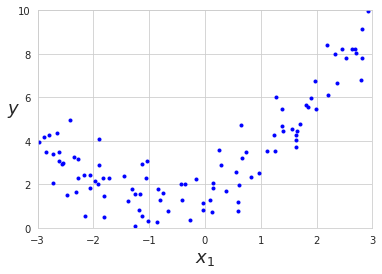

In [9]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X_poly.shape)

(100, 2)


In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[1.78134581] [[0.93366893 0.56456263]]


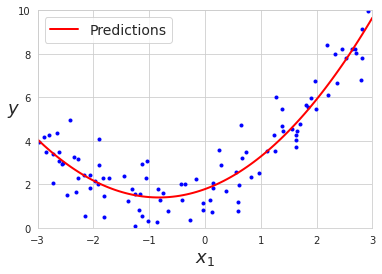

In [12]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

<h1>学習曲線</h1>

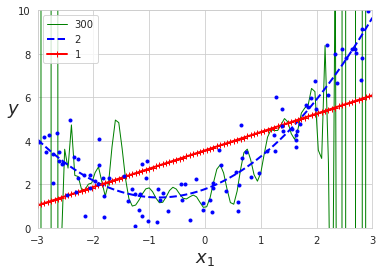

In [13]:
# 300次モデルは明らかに過学習している。線形モデルは明らかに過小適合している。この場合、最も汎化しているのは2次モデルである
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

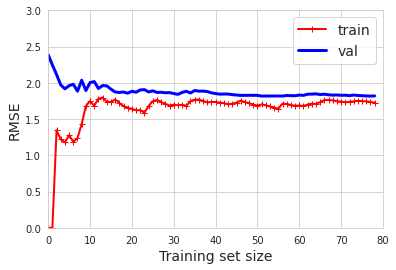

In [15]:
# 線形モデルについて学習曲線を描く
# 両方の曲線が一定の水準に達し、共に近接しているが、全体として誤差が大きいため、これは過小適合している
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

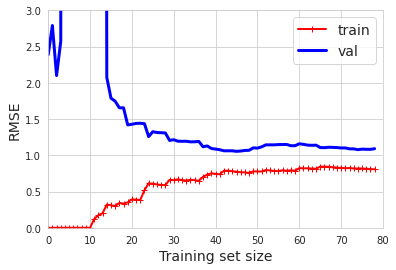

In [16]:
# 10次モデルについて学習曲線を描く
# 2つの曲線の間に大きな差がある。これは、検証データに対する性能よりも訓練データに対する性能の方がかなり高いということであり、過学習の顕著な特徴である
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("polu_features", PolynomialFeatures(degree=10, include_bias = False)),
    ("lin_reg", LinearRegression())])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown

<h1>Ridge</h1>

In [17]:
from sklearn.linear_model import Ridge

In [18]:
ridge = Ridge().fit(X_train, y_train)
print(f"Training set score: {ridge.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge.score(X_test, y_test):.2f}")

Training set score: 0.89
Test set score: 0.75


In [19]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print(f"Training set score: {ridge10.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge10.score(X_test, y_test):.2f}")

Training set score: 0.79
Test set score: 0.64


In [20]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print(f"Training set score: {ridge01.score(X_train, y_train):.2f}")
print(f"Test set score: {ridge01.score(X_test, y_test):.2f}")

Training set score: 0.93
Test set score: 0.77


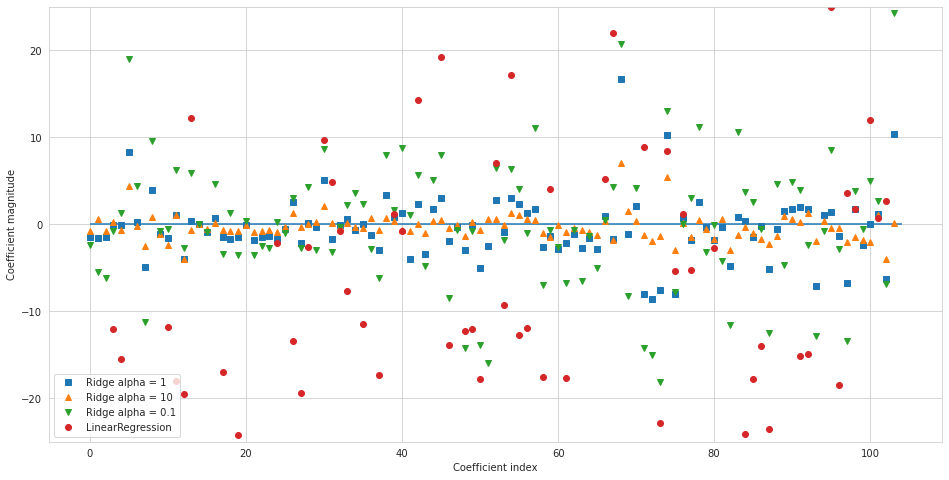

In [21]:
plt.figure(figsize = (16, 8))

plt.plot(ridge.coef_, "s", label = "Ridge alpha = 1")
plt.plot(ridge10.coef_, "^", label = "Ridge alpha = 10")
plt.plot(ridge01.coef_, "v", label = "Ridge alpha = 0.1")
plt.plot(lr.coef_, "o", label = "LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

<h1>Lasso</h1>

In [22]:
from sklearn.linear_model import Lasso

In [23]:
lasso = Lasso().fit(X_train, y_train)
print(f"Training set score: {lasso.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso.score(X_test, y_test):.2f}")

Training set score: 0.29
Test set score: 0.21


In [24]:
# 使用された特徴量の数
print(f"Number of features used: {np.sum(lasso.coef_ != 0)}")

Number of features used: 4


In [25]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print(f"Training set score: {lasso001.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso001.score(X_test, y_test):.2f}")

Training set score: 0.90
Test set score: 0.77


In [26]:
# 使用された特徴量の数
print(f"Number of features used: {np.sum(lasso001.coef_ != 0)}")

Number of features used: 33


In [27]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print(f"Training set score: {lasso00001.score(X_train, y_train):.2f}")
print(f"Test set score: {lasso00001.score(X_test, y_test):.2f}")

Training set score: 0.95
Test set score: 0.64


In [28]:
# 使用された特徴量の数
print(f"Number of features used: {np.sum(lasso00001.coef_ != 0)}")

Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

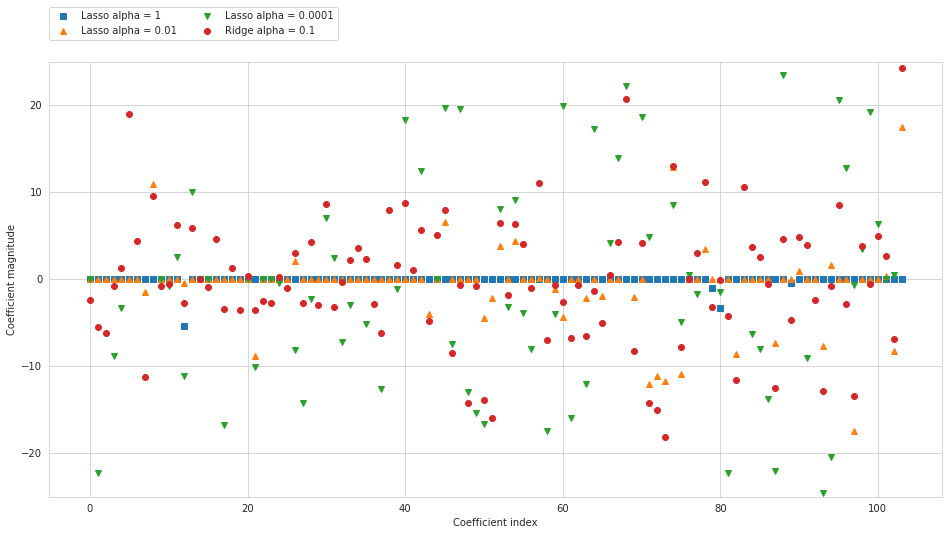

In [29]:
plt.figure(figsize = (16, 8))

plt.plot(lasso.coef_, "s", label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, "^", label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, "v", label = "Lasso alpha = 0.0001")
plt.plot(ridge01.coef_, "o", label = "Ridge alpha = 0.1")

plt.legend(ncol = 2, loc = (0,1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

<h1>Elastic Net</h1>

In [30]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5).fit(X_train, y_train)

# 決定係数
print(f"Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Test set score: {elastic_net.score(X_test, y_test):.2f}")

# 係数と切片
print(f"lr.coef_: {elastic_net.coef_}")
print(f"lr.intercept_: {elastic_net.intercept_}")

# 使用された特徴量の数
print(f"Number of features used: {np.sum(elastic_net.coef_ != 0)}")

Training set score: 0.72
Test set score: 0.55
lr.coef_: [-0.11668517  0.45449994 -0.69302345  0.4763029  -0.15742755  3.3411999
 -0.         -1.10302997  0.         -0.76577739 -2.44310046  0.81593634
 -3.68229623 -0.          0.         -0.          0.         -0.
 -0.         -0.04392692 -0.         -0.10634509 -0.01630692 -0.
 -0.         -0.          0.50142111 -0.          0.          0.
  1.13562036  0.         -0.          0.         -0.         -0.
  0.48554848 -0.         -0.          0.         -0.34775794 -0.
 -0.14234577 -0.         -0.         -0.         -0.31701609 -0.
 -1.19205178  0.47633391  0.          0.37008422  0.32658736  0.
  0.61580677  0.39282295  0.19323358  0.50531751 -0.         -0.76139625
  0.         -0.36275775 -0.         -0.         -0.34129909 -0.62737161
  0.         -1.36265017  5.18790002  0.98595118  0.         -0.
 -0.07349976 -0.07112614  4.45852598 -1.41867541 -0.         -0.20644641
 -0.         -0.29114617 -1.52639896  0.07396454 -2.80936476